In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,52355,None,None,85806.182147
2020-06-13,52356,None,None,79696.265014
2020-06-14,52357,None,None,74029.796013
2020-06-15,52358,None,None,68691.417440
2020-06-16,52359,None,None,63934.173969
...,...,...,...,...
2021-04-26,52673,None,None,18813.505031
2021-04-27,52674,None,None,18133.060862
2021-04-28,52675,None,None,17520.706119


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-30_2021-04-30-13-37.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-29_2021-04-29-17-26.pickle


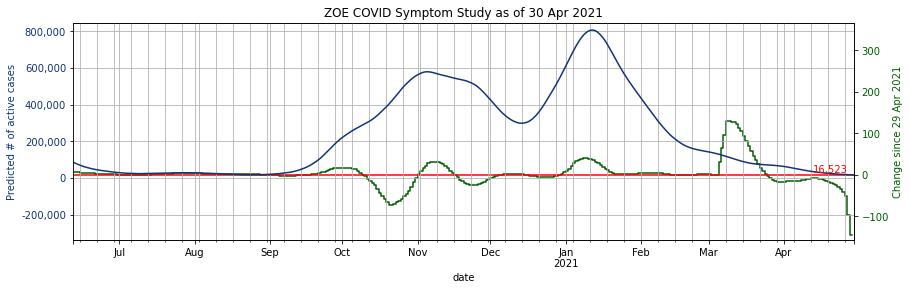

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

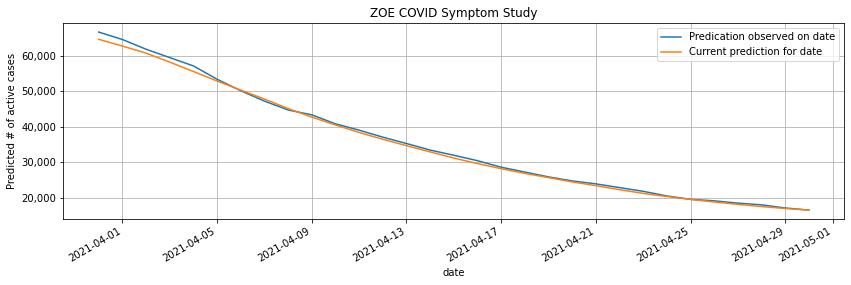

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-04-30_2021-04-30-13-37.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
309,Scottish Borders,S12000026,1.443581
169,Chorley,E07000118,0.415634
248,Rugby,E07000220,0.283662
334,Wrexham,W06000006,0.282320
239,Leeds,E08000035,0.192318
276,Liverpool,E08000012,0.165832
302,Kirklees,E08000034,0.156240
15,"Kingston upon Hull, City of",E06000010,0.154312
18,North Lincolnshire,E06000013,0.133911
347,Hammersmith and Fulham,E09000013,0.109717
